# Titanic Dataset Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Importing Data

In [2]:
data = pd.read_csv(r'c:Downloads/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preprocessing
#### Inspecting the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.shape

(891, 12)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling Missing Values and Cleaning Data

In [7]:
columns_to_fill = ['Age']
for column in columns_to_fill:
    data[column].fillna(data[column].mean(), inplace=True)

# fill missing Cabin values with 'U'unknown'
data['Cabin'] = data['Cabin'].fillna('U')

# fill embarked missing values with the frequent value
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,29.699118,1,0,PC 17604,82.1708,U,C
512,513,1,1,"McGough, Mr. James Robert",male,36.000000,0,0,PC 17473,26.2875,E25,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.000000,1,1,248738,29.0000,U,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,U,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,29.699118,1,0,PC 17611,133.6500,U,S


In [10]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


## Creating new Feature

In [11]:
data['Deck'] = data['Cabin'].str[0]

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Drop columns that will not be used in the model
data = data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# encode the Embarked and Deck columns into binary
data = pd.get_dummies(data, columns=['Embarked', 'Deck'], drop_first=True)

print(data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           2       False   
1         1       1    0  38.0      1      0  71.2833           2       False   
2         1       3    0  26.0      0      0   7.9250           1       False   
3         1       1    0  35.0      1      0  53.1000           2       False   
4         0       3    1  35.0      0      0   8.0500           1       False   

   Embarked_S  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_U  
0        True   False   False   False   False   False   False   False    True  
1       False   False    True   False   False   False   False   False   False  
2        True   False   False   False   False   False   False   False    True  
3        True   False    True   False   False   False   False   False   False  
4        True   False   False   False   False   False   False   False    True  


## EDA (Exploratory Data Analysis)

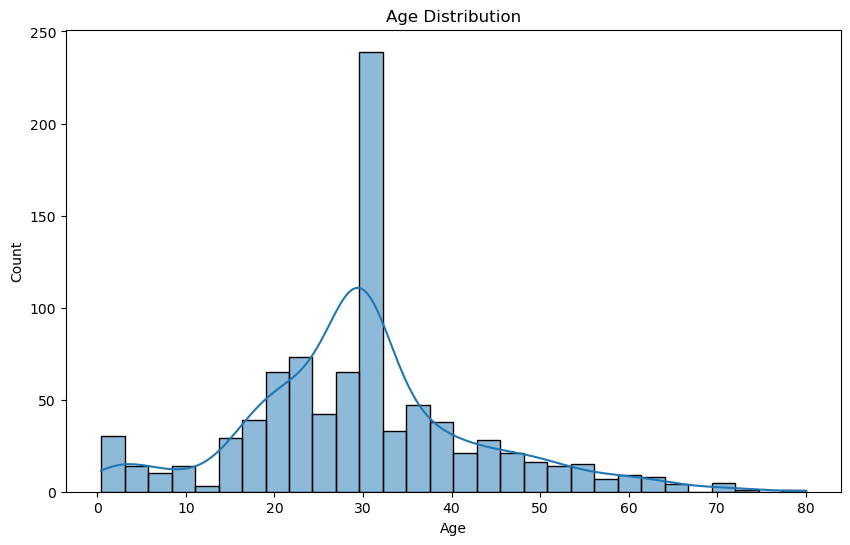

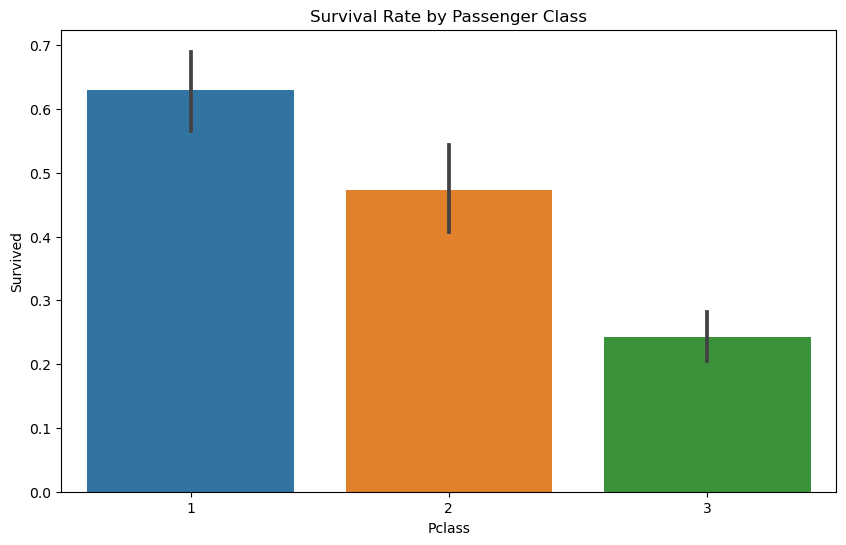

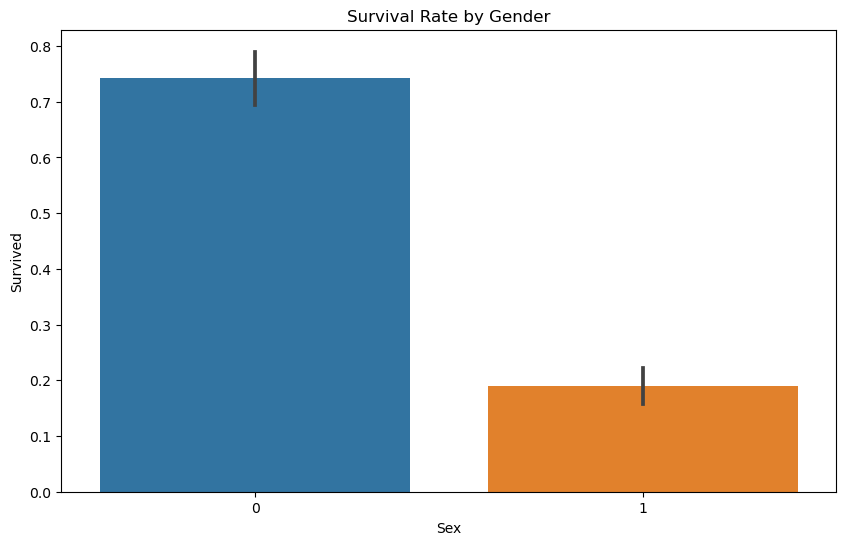

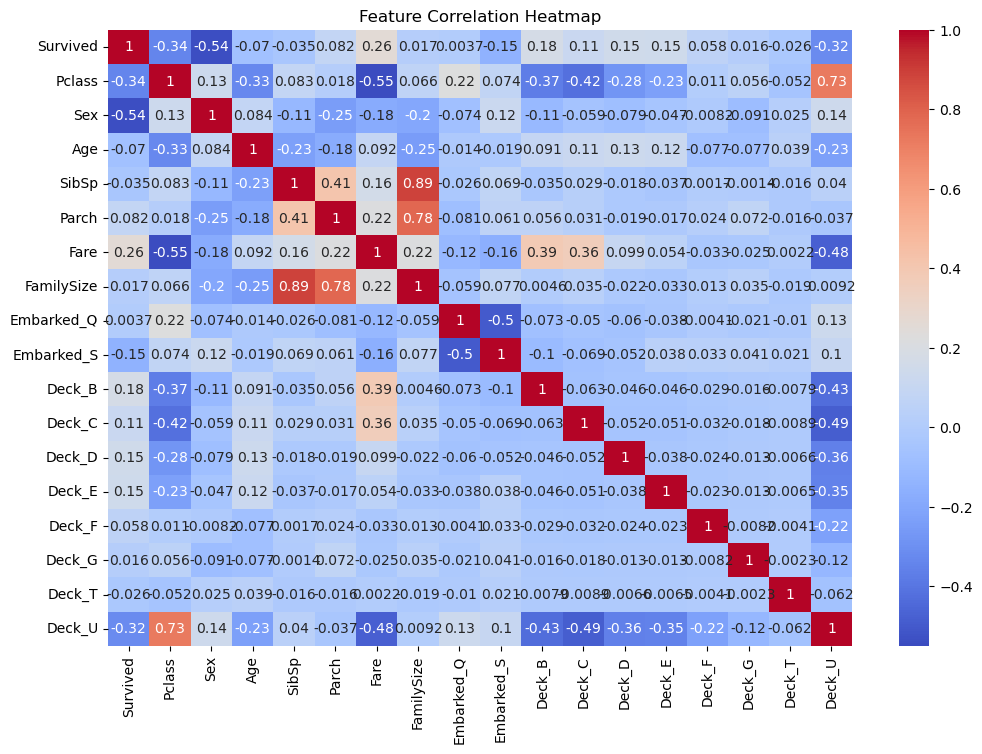

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### split data set into training and testing sets

In [13]:
X = data.drop(columns=['Survived'])
y = data['Survived']

In [14]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model training and evaluation

In [15]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7821229050279329
Precision: 0.7464788732394366
Recall: 0.7162162162162162
F1 Score: 0.7310344827586208
Confusion Matrix:
 [[87 18]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



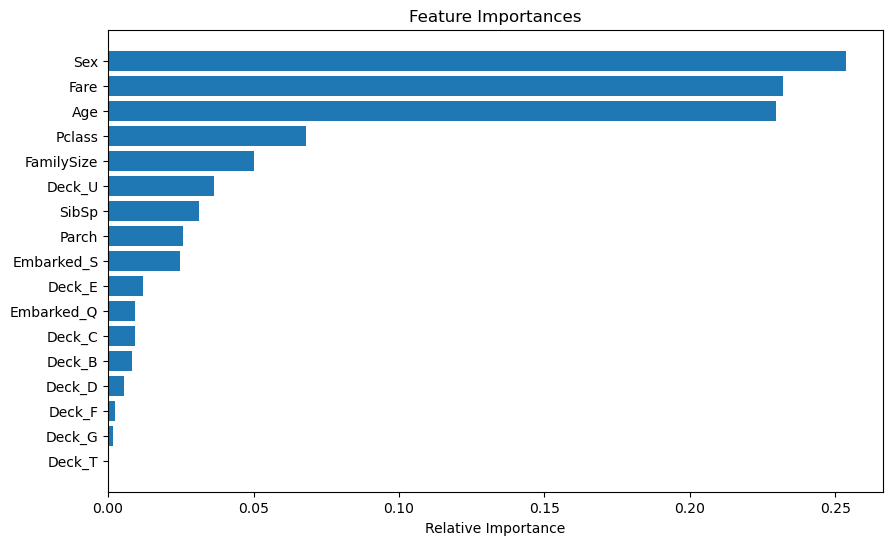

In [16]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# model evaluation
print('Decision Tree Classifier Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_tree))
print('Precision:', precision_score(y_test, y_pred_tree))
print('Recall:', recall_score(y_test, y_pred_tree))
print('F1 Score:', f1_score(y_test, y_pred_tree))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_tree))
print('Classification Report:\n', classification_report(y_test, y_pred_tree))

Decision Tree Classifier Metrics:
Accuracy: 0.8100558659217877
Precision: 0.7777777777777778
Recall: 0.7567567567567568
F1 Score: 0.7671232876712328
Confusion Matrix:
 [[89 16]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Other Models for Comparison

In [18]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('Precision:', precision_score(y_test, y_pred_log_reg))
print('Recall:', recall_score(y_test, y_pred_log_reg))
print('F1 Score:', f1_score(y_test, y_pred_log_reg))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_log_reg))
print('Classification Report:\n', classification_report(y_test, y_pred_log_reg))

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Support Vector Machine Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('F1 Score:', f1_score(y_test, y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

# Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print('Gradient Boosting Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_gbc))
print('Precision:', precision_score(y_test, y_pred_gbc))
print('Recall:', recall_score(y_test, y_pred_gbc))
print('F1 Score:', f1_score(y_test, y_pred_gbc))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_gbc))
print('Classification Report:\n', classification_report(y_test, y_pred_gbc))

Logistic Regression Metrics:
Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901
Confusion Matrix:
 [[91 14]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Support Vector Machine Metrics:
Accuracy: 0.8044692737430168
Precision: 0.76
Recall: 0.7702702702702703
F1 Score: 0.7651006711409396
Confusion Matrix:
 [[87 18]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179


## Hyperparameter Tuning for Random Forest

In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Tuned Random Forest Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_best))
print('Precision:', precision_score(y_test, y_pred_best))
print('Recall:', recall_score(y_test, y_pred_best))
print('F1 Score:', f1_score(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))
print('Classification Report:\n', classification_report(y_test, y_pred_best))

# Cross-validation for Random Forest
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X_scaled, y, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean CV score:', cv_scores.mean())

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest Metrics:
Accuracy: 0.8100558659217877
Precision: 0.8125
Recall: 0.7027027027027027
F1 Score: 0.7536231884057971
Confusion Matrix:
 [[93 12]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Cross-validation scores: [0.78212291 0.79775281 0.83146067 0.76404494 0.84269663]
Mean CV score: 0.8036155922415416
